In [1]:
import heapq

def dijkstra(graph, source):
    distances = {node: float('inf') for node in graph}
    distances[source] = 0
    queue = [(0, source)]

    while queue:
        current_dist, current_node = heapq.heappop(queue)

        if current_dist > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return distances


In [2]:

# Example graph represented using dictionaries
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'D': 5},
    'C': {'A': 2, 'D': 7},
    'D': {'B': 5, 'C': 7}
}

source_node = 'A'
shortest_distances = dijkstra(graph, source_node)
print("Shortest distances from", source_node, ":", shortest_distances)


Shortest distances from A : {'A': 0, 'B': 4, 'C': 2, 'D': 9}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=7)


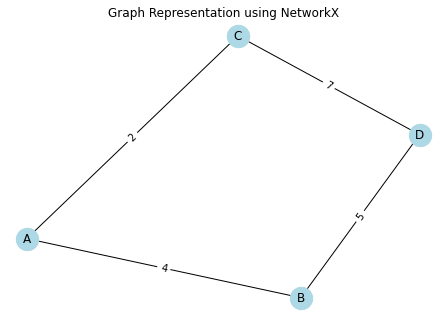

Shortest paths from node A: {'A': 0, 'C': 2, 'B': 4, 'D': 9}


In [4]:
# Calculate shortest paths using NetworkX
shortest_paths = nx.shortest_path_length(G, source='A', weight='weight')

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Representation using NetworkX")
plt.show()

print("Shortest paths from node A:", shortest_paths)

In [7]:
# More complex graph represented as a dictionary
graph_complex = {
    'A': {'B': 2, 'C': 5},
    'B': {'A': 2, 'D': 3, 'E': 9},
    'C': {'A': 5, 'F': 7},
    'D': {'B': 3, 'G': 1, 'I': 5},
    'E': {'B': 9, 'H': 6},
    'F': {'C': 7, 'I': 4},
    'G': {'D': 1, 'H': 8},
    'H': {'E': 6, 'G': 8, 'I': 3},
    'I': {'D': 5, 'F': 4, 'H': 3}
}

source_node_complex = 'A'
shortest_distances_complex = dijkstra(graph_complex, source_node_complex)
print("Shortest distances from", source_node_complex, ":", shortest_distances_complex)


Shortest distances from A : {'A': 0, 'B': 2, 'C': 5, 'D': 5, 'E': 11, 'F': 12, 'G': 6, 'H': 13, 'I': 10}


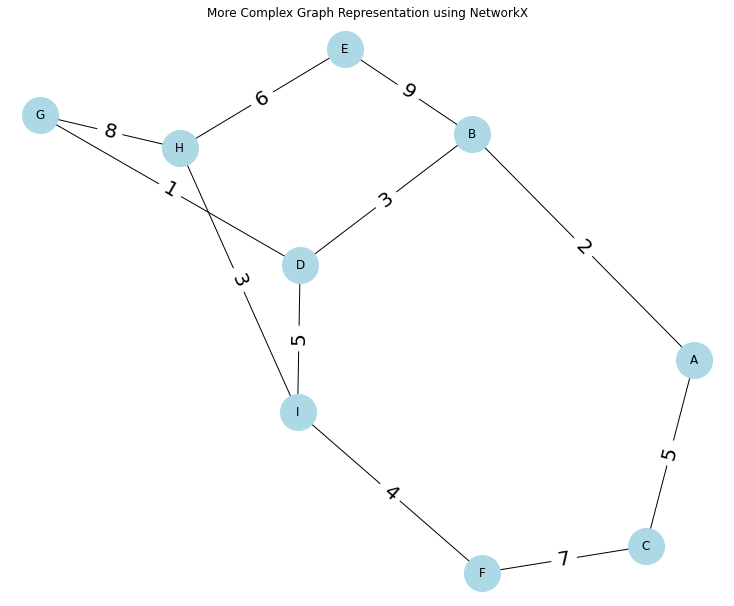

Shortest paths from node A in the complex graph: {'A': 0, 'B': 2, 'C': 5, 'D': 5, 'G': 6, 'I': 10, 'E': 11, 'F': 12, 'H': 13}


In [22]:
# Create a more complex graph
G_complex = nx.Graph()
edges = [
    ('A', 'B', {'weight': 2}),
    ('A', 'C', {'weight': 5}),
    ('B', 'D', {'weight': 3}),
    ('B', 'E', {'weight': 9}),
    ('C', 'F', {'weight': 7}),
    ('D', 'G', {'weight': 1}),
    ('E', 'H', {'weight': 6}),
    ('F', 'I', {'weight': 4}),
    ('G', 'H', {'weight': 8}),
    ('H', 'I', {'weight': 3}),
    ('D', 'I', {'weight': 5})
]

G_complex.add_edges_from(edges)

# Calculate shortest paths using NetworkX
shortest_paths_complex = nx.shortest_path_length(G_complex, source='A', weight='weight')

# Visualize the more complex graph
pos_complex = nx.spring_layout(G_complex)

plt.figure(figsize=(10, 8)) 
nx.draw(G_complex, pos_complex, with_labels=True, node_color='lightblue', node_size=1300)
labels_complex = nx.get_edge_attributes(G_complex, 'weight')
nx.draw_networkx_edge_labels(G_complex, pos_complex, edge_labels=labels_complex,font_size = 20)
plt.title("More Complex Graph Representation using NetworkX")
plt.show()

print("Shortest paths from node A in the complex graph:", shortest_paths_complex)


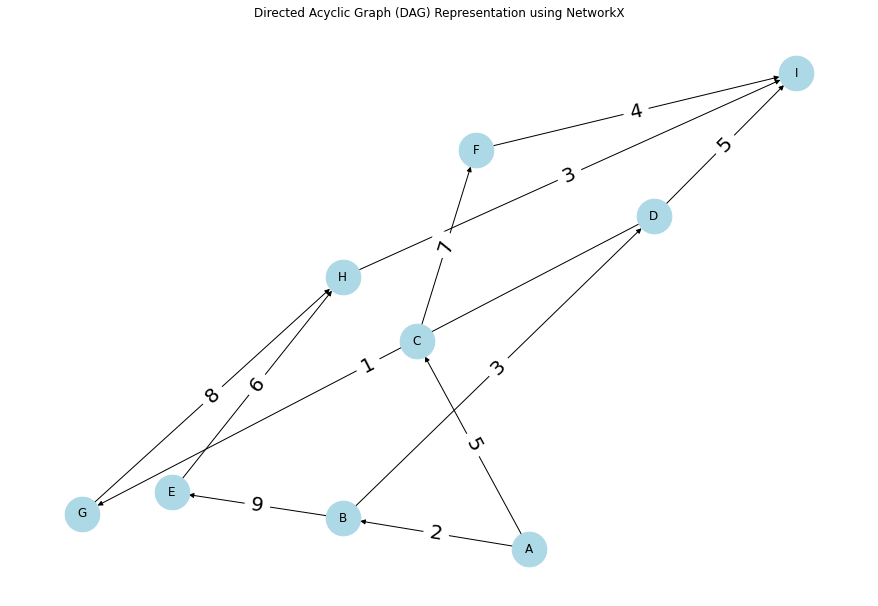

Shortest paths from node A in the DAG: {'A': 0, 'B': 2, 'C': 5, 'D': 5, 'G': 6, 'I': 10, 'E': 11, 'F': 12, 'H': 14}


In [24]:
# Create a Directed Acyclic Graph (DAG)
G_dag = nx.DiGraph()
edges_dag = [
    ('A', 'B', {'weight': 2}),
    ('A', 'C', {'weight': 5}),
    ('B', 'D', {'weight': 3}),
    ('B', 'E', {'weight': 9}),
    ('C', 'F', {'weight': 7}),
    ('D', 'G', {'weight': 1}),
    ('E', 'H', {'weight': 6}),
    ('F', 'I', {'weight': 4}),
    ('G', 'H', {'weight': 8}),
    ('H', 'I', {'weight': 3}),
    ('D', 'I', {'weight': 5})
]

G_dag.add_edges_from(edges_dag)

# Calculate shortest paths in the DAG using NetworkX
shortest_paths_dag = nx.shortest_path_length(G_dag, source='A', weight='weight')

# Visualize the DAG
pos_dag = nx.spring_layout(G_dag)
plt.figure(figsize=(12,8))
nx.draw(G_dag, pos_dag, with_labels=True, node_color='lightblue', node_size=1200, arrows=True)
labels_dag = nx.get_edge_attributes(G_dag, 'weight')
nx.draw_networkx_edge_labels(G_dag, pos_dag, edge_labels=labels_dag, font_size=20)
plt.title("Directed Acyclic Graph (DAG) Representation using NetworkX")
plt.show()

print("Shortest paths from node A in the DAG:", shortest_paths_dag)


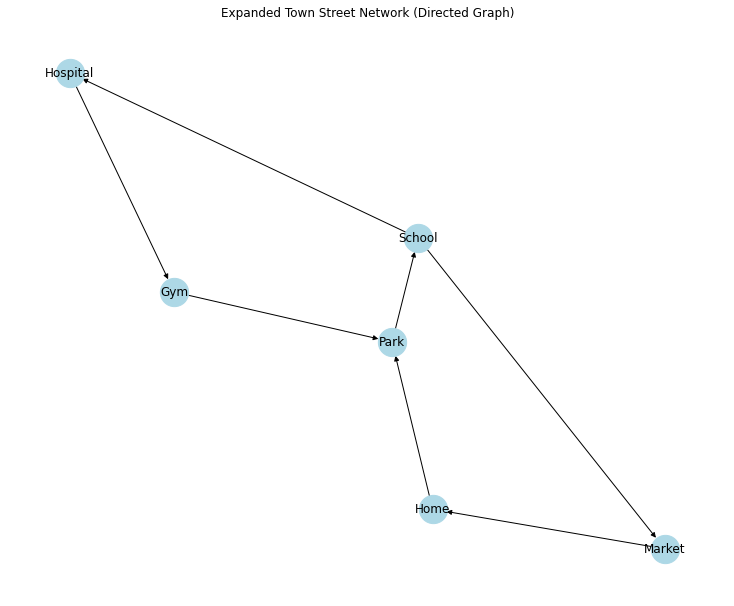

In [25]:

# Create a directed graph representing one-way streets in a town
town_graph = nx.DiGraph()
streets = [
    ('Home', 'Park'),       # Street from Home to Park
    ('Park', 'School'),     # Street from Park to School
    ('School', 'Market'),   # Street from School to Market
    ('Market', 'Home'),     # Street from Market back to Home (one-way)
    ('School', 'Hospital'), # Street from School to Hospital
    ('Hospital', 'Gym'),    # Street from Hospital to Gym
    ('Gym', 'Park')         # Street from Gym back to Park (one-way)
]

town_graph.add_edges_from(streets)

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Visualize the directed graph representing the town's street network
pos = nx.spring_layout(town_graph)
nx.draw(town_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrows=True)
plt.title("Expanded Town Street Network (Directed Graph)")
plt.show()
